In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('./data/forestfires.csv')
print(data.shape)
data.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Заменим словесные обозначения на числовые

In [19]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
                 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 
               'fri': 5, 'sat': 6, 'sun': 7 }
data = original_data.replace({'month': month_mapping, 'day': day_mapping});
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


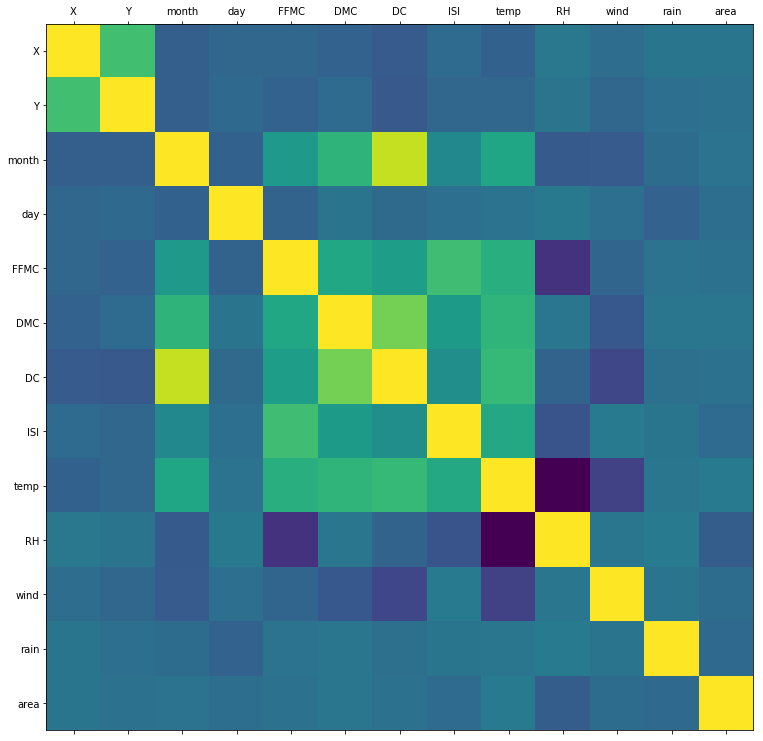

In [22]:
corr = data.corr()
COUNT_COLUMN = len(corr.columns)
fig, ax = plt.subplots(figsize=(COUNT_COLUMN, COUNT_COLUMN))
ax.matshow(corr)
plt.xticks(range(COUNT_COLUMN), corr.columns)
plt.yticks(range(COUNT_COLUMN), corr.columns)
plt.show()

In [23]:
X_data = data.drop(['area'], axis=1)
Y_data = data['area']

In [24]:
X_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [25]:
Y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=5)

Создадим svm-модель по дефолту

In [35]:
svm = SVR()
svm.fit(X_train, Y_train)
predict = svm.predict(X_test)

Среднеквадратичная ошибка:

In [42]:
print(mean_squared_error(Y_test, predict))

11713.0667056


In [54]:
gridSearchCV = GridSearchCV(svm,
                  {'kernel': ['rbf', 'linear', 'sigmoid'],
                   'C': [1, 2, 3],
                   'epsilon': [0.1, 0.01]},
                   scoring='neg_mean_squared_error', cv=3, n_jobs=1)
gridSearchCV.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1, 2, 3], 'epsilon': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

Более удачные параметры:

In [55]:
gridSearchCV.best_params_

{'C': 3, 'epsilon': 0.1, 'kernel': 'rbf'}

Средне квадратичная ошибка с этими параметрами:

In [58]:
-gridSearchCV.best_score_

2270.9011689416629